### Student Name: Feliciann Elliot
### Course: MAI5301 - Foundations Of Large Language Models
### Activity: Assigment #1

In [66]:
!git clone https://github.com/rasbt/LLMs-from-scratch.git

fatal: destination path 'LLMs-from-scratch' already exists and is not an empty directory.


In [67]:
!pip install torch numpy matplotlib tiktoken
!pip install tqdm tensorboard

In [68]:
import re

In [69]:
class SimpleTokenizer:
    def __init__(self, vocab=None, unk_token="<unk>"):
        self.unk_token = unk_token
        self.vocab = vocab or {unk_token: 0}
        self.inv_vocab = {i: t for t, i in self.vocab.items()}

    def _tokenize(self, text: str):
        # Basic regex: words and punctuation
        return re.findall(r"\w+|[^\w\s]", text, re.UNICODE)

    def build_vocab(self, texts, min_freq=1):
        counter = Counter()
        for text in texts:
            counter.update(self._tokenize(text))

        # Start fresh but keep unk at 0
        self.vocab = {self.unk_token: 0}
        idx = 1
        for token, freq in counter.items():
            if freq >= min_freq and token not in self.vocab:
                self.vocab[token] = idx
                idx += 1

        self.inv_vocab = {i: t for t, i in self.vocab.items()}

    def encode(self, text: str):
        tokens = self._tokenize(text)
        return [self.vocab.get(t, self.vocab[self.unk_token]) for t in tokens]

    def decode(self, ids):
        tokens = [self.inv_vocab.get(i, self.unk_token) for i in ids]
        # simple join with spacing rules
        out = ""
        for t in tokens:
            if re.match(r"[^\w\s]", t):  # punctuation
                out += t
            else:
                out += (" " if out else "") + t
        return out

In [70]:
sample_text = "Hello world! This is a test."
tok = SimpleTokenizer()
tok.build_vocab([sample_text])

print("Original:", sample_text)

tokens = tok._tokenize(sample_text)
print("Tokens:", tokens)

ids = tok.encode(sample_text)
print("Encoded IDs:", ids)

decoded = tok.decode(ids)
print("Decoded:", decoded)

# Unknown token test:
unknown_text = "Hello unknownword!!!"
print("\nUnknown test text:", unknown_text)
print("Unknown encoded IDs:", tok.encode(unknown_text))
print("Unknown decoded:", tok.decode(tok.encode(unknown_text)))

print("\nVocab size:", len(tok.vocab))

Original: Hello world! This is a test.
Tokens: ['Hello', 'world', '!', 'This', 'is', 'a', 'test', '.']
Encoded IDs: [1, 2, 3, 4, 5, 6, 7, 8]
Decoded: Hello world! This is a test.

Unknown test text: Hello unknownword!!!
Unknown encoded IDs: [1, 0, 3, 3, 3]
Unknown decoded: Hello<unk>!!!

Vocab size: 9


Top 20 most frequent token IDs:
ID 995    Count 30     TokenPiece ' world'
ID 0      Count 30     TokenPiece '!'
ID 770    Count 30     TokenPiece ' This'
ID 318    Count 30     TokenPiece ' is'
ID 257    Count 30     TokenPiece ' a'
ID 1332   Count 30     TokenPiece ' test'
ID 13     Count 30     TokenPiece '.'
ID 18435  Count 29     TokenPiece ' Hello'
ID 15496  Count 1      TokenPiece 'Hello'
ID 220    Count 1      TokenPiece ' '


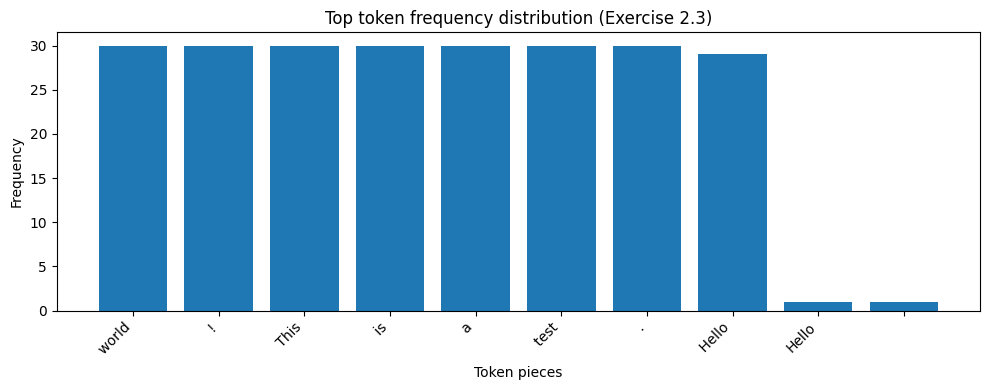

In [88]:
# Exercise 2.3: Analyze token frequency distribution in your dataset

import matplotlib.pyplot as plt
from collections import Counter

enc = tiktoken.get_encoding("gpt2")

ex_text = "Hello world! This is a test. " * 30
ids = enc.encode(ex_text)

freq = Counter(ids)

top_n = 20
most_common = freq.most_common(top_n)

print(f"Top {top_n} most frequent token IDs:")
for tid, count in most_common:
    print(f"ID {tid:<6} Count {count:<6} TokenPiece {repr(enc.decode([tid]))}")

counts = [c for _, c in most_common]
labels = [enc.decode([tid]) for tid, _ in most_common]

plt.figure(figsize=(10,4))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), labels, rotation=45, ha="right")
plt.xlabel("Token pieces")
plt.ylabel("Frequency")
plt.title("Top token frequency distribution (Exercise 2.3)")
plt.tight_layout()
plt.show()

In [72]:
import matplotlib.pyplot as plt

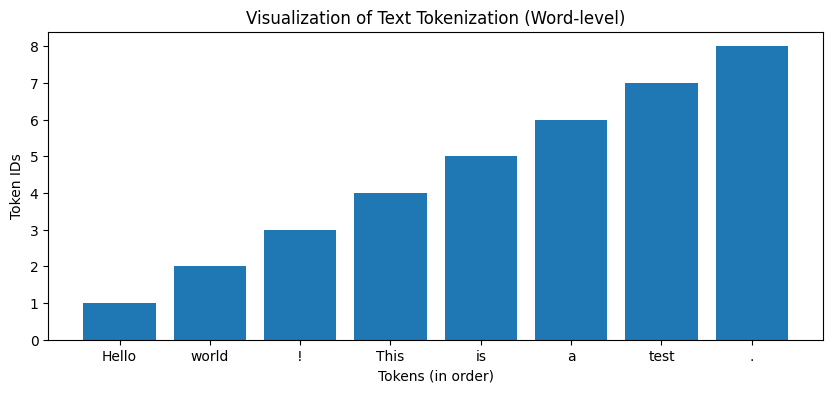

In [73]:
positions = list(range(len(tokens)))

plt.figure(figsize=(10, 4))
plt.bar(positions, ids)
plt.xticks(positions, tokens)
plt.xlabel("Tokens (in order)")
plt.ylabel("Token IDs")
plt.title("Visualization of Text Tokenization (Word-level)")

plt.show()

In [74]:
print("Original text:")
print(sample_text)

print("\nTokenization visualization:\n")
print(f"{'Token':<15} | {'Token ID'}")
print("-" * 30)

for t, i in zip(tokens, ids):
    print(f"{t:<15} | {i}")

Original text:
Hello world! This is a test.

Tokenization visualization:

Token           | Token ID
------------------------------
Hello           | 1
world           | 2
!               | 3
This            | 4
is              | 5
a               | 6
test            | 7
.               | 8


In [75]:
!pip -q install tiktoken
import tiktoken

In [76]:
enc = tiktoken.get_encoding("gpt2")

In [77]:
text = "Hello world! This is a test."

ids = enc.encode(text)

print("Original:", text)
print("BPE IDs:", ids)
print("Decoded:", enc.decode(ids))

Original: Hello world! This is a test.
BPE IDs: [15496, 995, 0, 770, 318, 257, 1332, 13]
Decoded: Hello world! This is a test.


In [78]:
# SimpleTokenizer results
simple_tokens = tok._tokenize(text)
simple_ids = tok.encode(text)

# tiktoken results
bpe_ids = enc.encode(text)
bpe_pieces = [enc.decode([i]) for i in bpe_ids]

print("TEXT:")
print(text)

print("\nSimpleTokenizer")
print("Tokens:", simple_tokens)
print("Num tokens:", len(simple_tokens))
print("IDs:", simple_ids)
print("Decoded:", tok.decode(simple_ids))

print("\ntiktoken GPT-2 BPE")
print("Token pieces:", bpe_pieces)
print("Num tokens:", len(bpe_ids))
print("IDs:", bpe_ids)
print("Decoded:", enc.decode(bpe_ids))

print("\nQuick comparison summary")
print("SimpleTokenizer token count:", len(simple_tokens))
print("BPE token count:", len(bpe_ids))

TEXT:
Hello world! This is a test.

SimpleTokenizer
Tokens: ['Hello', 'world', '!', 'This', 'is', 'a', 'test', '.']
Num tokens: 8
IDs: [1, 2, 3, 4, 5, 6, 7, 8]
Decoded: Hello world! This is a test.

tiktoken GPT-2 BPE
Token pieces: ['Hello', ' world', '!', ' This', ' is', ' a', ' test', '.']
Num tokens: 8
IDs: [15496, 995, 0, 770, 318, 257, 1332, 13]
Decoded: Hello world! This is a test.

Quick comparison summary
SimpleTokenizer token count: 8
BPE token count: 8


In [79]:
print("GPT-2 BPE vocab size (enc.n_vocab):", enc.n_vocab)

# Show a few example token IDs -> token text pieces
example_ids = [0, 1, 2, 10, 100, 1000]
for i in example_ids:
    print(i, "->", repr(enc.decode([i])))

GPT-2 BPE vocab size (enc.n_vocab): 50257
0 -> '!'
1 -> '"'
2 -> '#'
10 -> '+'
100 -> '�'
1000 -> 'ale'


In [80]:
special_text = "Hello world! <|endoftext|>"
ids_special = enc.encode(special_text, allowed_special={"<|endoftext|>"})

print("Special text:", special_text)

print("Special IDs:", ids_special)
print("Decoded:", enc.decode(ids_special))

Special text: Hello world! <|endoftext|>
Special IDs: [15496, 995, 0, 220, 50256]
Decoded: Hello world! <|endoftext|>


In [81]:
# Exercise 2.1: Character-level tokenizer & vocab size comparison with BPE

def char_tokenize(text):
    return list(text)

ex_text = ("This is a tiny dataset for comparison. " * 10)

# Character vocab
char_tokens = char_tokenize(ex_text)
char_vocab = sorted(set(char_tokens))

bpe_ids_ex = enc.encode(ex_text)

print("Exercise 2.1 text sample length (chars):", len(ex_text))
print("Character vocab size:", len(char_vocab))
print("First 30 char vocab symbols:", char_vocab[:30])

print("\nBPE vocab size (fixed GPT-2):", enc.n_vocab)
print("BPE token count for sample:", len(bpe_ids_ex))
print("First 20 BPE token pieces:", [enc.decode([i]) for i in bpe_ids_ex[:20]])

Exercise 2.1 text sample length (chars): 390
Character vocab size: 18
First 30 char vocab symbols: [' ', '.', 'T', 'a', 'c', 'd', 'e', 'f', 'h', 'i', 'm', 'n', 'o', 'p', 'r', 's', 't', 'y']

BPE vocab size (fixed GPT-2): 50257
BPE token count for sample: 81
First 20 BPE token pieces: ['This', ' is', ' a', ' tiny', ' dataset', ' for', ' comparison', '.', ' This', ' is', ' a', ' tiny', ' dataset', ' for', ' comparison', '.', ' This', ' is', ' a', ' tiny']


In [82]:
import torch
from torch.utils.data import Dataset, DataLoader

In [83]:
class SlidingWindowDataset(Dataset):
    def __init__(self, token_ids, context_length, stride=1):
        self.token_ids = token_ids
        self.context_length = context_length
        self.stride = stride

        self.num_samples = (len(token_ids) - (context_length + 1)) // stride + 1
        if self.num_samples < 1:
            raise ValueError("Not enough tokens to create even one sample.")

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        start = idx * self.stride
        end = start + self.context_length

        x = self.token_ids[start:end]
        y = self.token_ids[start+1:end+1]  # shifted by 1

        return torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)


In [84]:
text = ("This is a tiny dataset for sliding window sampling. " * 50)
token_ids = enc.encode(text)

context_length = 16
stride = 4

ds = SlidingWindowDataset(token_ids, context_length=context_length, stride=stride)
print("Number of samples:", len(ds))

x0, y0 = ds[0]

print("\nFirst sample shapes:", x0.shape, y0.shape)

print("\nx0 shape:", x0.shape, "y0 shape:", y0.shape)

print("x0:", x0.tolist())
print("y0:", y0.tolist())

print("\nDecoded x0:", enc.decode(x0.tolist()))
print("\nDecoded y0:", enc.decode(y0.tolist()))

Number of samples: 122

First sample shapes: torch.Size([16]) torch.Size([16])

x0 shape: torch.Size([16]) y0 shape: torch.Size([16])
x0: [1212, 318, 257, 7009, 27039, 329, 22292, 4324, 19232, 13, 770, 318, 257, 7009, 27039, 329]
y0: [318, 257, 7009, 27039, 329, 22292, 4324, 19232, 13, 770, 318, 257, 7009, 27039, 329, 22292]

Decoded x0: This is a tiny dataset for sliding window sampling. This is a tiny dataset for

Decoded y0:  is a tiny dataset for sliding window sampling. This is a tiny dataset for sliding


In [85]:
batch_size = 8
loader = DataLoader(ds, batch_size=batch_size, shuffle=True, drop_last=True)

xb, yb = next(iter(loader))
print("Batch x shape:", xb.shape)
print("Batch y shape:", yb.shape)

print("\nBatch x:", xb)
print("\nBatch y:", yb)

print("\nDecoded batch x:", enc.decode(xb[0].tolist()))
print("\nDecoded batch y:", enc.decode(yb[0].tolist()))

Batch x shape: torch.Size([8, 16])
Batch y shape: torch.Size([8, 16])

Batch x: tensor([[  257,  7009, 27039,   329, 22292,  4324, 19232,    13,   770,   318,
           257,  7009, 27039,   329, 22292,  4324],
        [22292,  4324, 19232,    13,   770,   318,   257,  7009, 27039,   329,
         22292,  4324, 19232,    13,   770,   318],
        [  770,   318,   257,  7009, 27039,   329, 22292,  4324, 19232,    13,
           770,   318,   257,  7009, 27039,   329],
        [22292,  4324, 19232,    13,   770,   318,   257,  7009, 27039,   329,
         22292,  4324, 19232,    13,   770,   318],
        [  770,   318,   257,  7009, 27039,   329, 22292,  4324, 19232,    13,
           770,   318,   257,  7009, 27039,   329],
        [ 1212,   318,   257,  7009, 27039,   329, 22292,  4324, 19232,    13,
           770,   318,   257,  7009, 27039,   329],
        [  770,   318,   257,  7009, 27039,   329, 22292,  4324, 19232,    13,
           770,   318,   257,  7009, 27039,   329],
   